# Cluster 

# Import Libraries

In [3]:
!pip install pyLDAvis



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=98fbc6ccd6540676c7c7c7eaaf5d56ecdbf261e2ccf7e99306cb1bac57558fb5
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [4]:
import gzip
import re
from tqdm import tqdm
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import ConfusionMatrixDisplay
from collections import Counter  # to get the most common words in a string 
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample

import requests
import json   
from PIL import Image
from skimage import io

vocab = Counter()
sns.reset_defaults()

 
from sklearn.decomposition import LatentDirichletAllocation
import requests
import json   
from PIL import Image
from skimage import io
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from sklearn.feature_extraction.text import CountVectorizer
vocab = Counter()
sns.reset_defaults()
nltk.download('stopwords')

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


# Load the data

In [ ]:
import requests
url = 'http://snap.stanford.edu/data/amazon/Books.txt.gz'
r = requests.get(url, allow_redirects=True)
open('/content/drive/MyDrive/NLP/Books.txt.gz', 'wb').write(r.content)

In [ ]:
def parse(filename):
  f = gzip.open(filename, 'r')
  entry = {}
  for l in f:
    l = l.decode("ascii")
    l = l.strip()
    colonPos = l.find(':')
    if colonPos == -1:
      yield entry
      entry = {}
      continue
    eName = l[:colonPos]
    rest = l[colonPos+2:]
    entry[eName] = rest
  yield entry

In [ ]:
uni=[]

In [ ]:
dict = []
reviews_num = 0
for e in tqdm(parse("/content/drive/MyDrive/Books.txt.gz")):
  if reviews_num<9000000:
    reviews_num += 1
    continue
  dict.append(e)
  reviews_num += 1
  if reviews_num==12000000:
    break

In [ ]:
df=pd.DataFrame(dict)

In [ ]:
uni.append(df['product/title'].unique())

In [ ]:
uni

In [ ]:
dict=None
df=None

In [ ]:
ls=np.concatenate(uni, axis=0 )

In [ ]:
ls

In [ ]:
df=pd.DataFrame({'Title':uni[0]})
df.to_csv('/content/drive/MyDrive/names.csv')

### add more details using Google Book Api 

In [ ]:
def get_book_details(bookname):
  if bookname is not str:
   bookname=str(bookname)
  response = requests.get("https://www.googleapis.com/books/v1/volumes?q="+bookname).text
  response_info = json.loads(response)
  try:
    df = pd.json_normalize(response_info['items'])
  except:
    df=None 
  return df

In [ ]:
def load_books_data(books):
    df=get_book_details(books['Title'])    
    try:
        books['description']=df['volumeInfo.description']
    except:
        books['description']=None
    try:   
      books['authors']=df['volumeInfo.authors']
    except:
      books['authors']=None
    try:
      books['image']=df['volumeInfo.imageLinks.thumbnail']
    except:
      books['image']=None
    try:
      books['previewLink']=df['volumeInfo.previewLink']
    except:
      books['previewLink']=None
    try:
      books['publisher']=df['volumeInfo.publisher']
    except:
      books['publisher']=None
    try:
      books['publishedDate']=df['volumeInfo.publishedDate']
    except:
      books['publishedDate']=None
    try:
      books['infoLink']=df['volumeInfo.infoLink']
    except:
      books['infoLink']=None
    try:
      books['categories']=df['volumeInfo.categories']
    except:
      books['categories']=None
    try:
      books['ratingsCount']=df['volumeInfo.ratingsCount']
    except:
      books['ratingsCount']=None

    return books



In [ ]:
from tqdm import tqdm
from tqdm.gui import tqdm as tqdm_gui
tqdm.pandas(ncols=50)
from tqdm.auto import tqdm
tqdm.pandas()
#/content/drive/MyDrive/names.csv
df=pd.read_csv('/content/drive/MyDrive/names.csv')
df = df.iloc[:10000,:].apply(load_books_data, axis=1)

In [ ]:
df.shape

In [ ]:
df.to_csv('/content/drive/MyDrive/Data_set/recommender_system/books.csv')

### load user data

In [7]:
#/content/drive/MyDrive/Data_set/recommender_system/books.csv
df=pd.read_csv('/content/drive/MyDrive/Data_set/recommender_system/books.csv')

In [8]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,0,0,Its Only Art If Its Well Hung!,0 ...,0 [Julie...,0 http://books.google.com/books/content?id=...,0 http://books.google.com/books?id=DykPAAAA...,0 NaN\n1 ...,0 1996\n1 2001\n2 2006-08...,0 http://books.google.com/books?id=DykPAAAA...,0 [Comics & Graphic Novels]\n1 [Comics &...,0 NaN\n1 NaN\n2 NaN\n3 3.0\n4 ...
1,1,1,Dr. Seuss: American Icon,0 Philip Nel takes a fascinating look into ...,0 [Philip Nel]\n1 ...,0 http://books.google.com/books/content?id=...,0 http://books.google.com/books?id=IjvHQsCn...,0 A&C Black\n1 Bloom...,0 2005-01-01\n1 2004-01-01\n2 2...,0 http://books.google.com/books?id=IjvHQsCn...,0 [Biography & Autobiography]\n1 ...,0 NaN\n1 NaN\n2 NaN\n3 6.0\n4 ...
2,2,2,Wonderful Worship in Smaller Churches,0 This resource includes twelve principles ...,0 [David R. Ray]\n1 ...,0 http://books.google.com/books/content?id=...,0 http://books.google.com/books?id=2tsDAAAA...,0 NaN\n1 T...,0 2000\n1 2009-06-01\n2 2010-07...,0 http://books.google.com/books?id=2tsDAAAA...,0 [Religion]\n1 [Religion]\n2 [Religi...,NaN
3,3,3,Whispers of the Wicked Saints,0 Julia Thomas finds her life spinning out ...,0 [Veronica Haddon]\n1 [Em...,0 http://books.google.com/books/content?id=...,0 http://books.google.com/books?id=aRSIgJlq...,0 iUniver...,0 2005-02\n1 2019-04-02\n2 2020-04...,0 http://books.google.com/books?id=aRSIgJlq...,0 [Fiction]\n1 [Young Adult ...,0 NaN\n1 14.0\n2 3.0\n3 NaN\n4 ...
4,4,4,"Nation Dance: Religion, Identity and Cultural ...","0 Addresses interplay of diverse spiritual,...",0 [Patrick...,0 http://books.google.com/books/content?id=...,0 http://books.google.com/books?id=MZUMnoy5...,0 Indiana University Press\n1 Col...,0 2001\n1 2016-04-19\n2 2013-04...,0 http://books.google.com/books?id=MZUMnoy5...,0 [Social Science]\n1 [Philosophy]...,0 1.0\n1 NaN\n2 NaN\n3 NaN\n4 N...


# Data Preparation

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     10000 non-null  int64 
 1   Unnamed: 0.1   10000 non-null  int64 
 2   Title          9999 non-null   object
 3   description    6171 non-null   object
 4   authors        6200 non-null   object
 5   image          6200 non-null   object
 6   previewLink    6204 non-null   object
 7   publisher      6154 non-null   object
 8   publishedDate  6204 non-null   object
 9   infoLink       6204 non-null   object
 10  categories     6199 non-null   object
 11  ratingsCount   5022 non-null   object
dtypes: int64(2), object(10)
memory usage: 937.6+ KB


## Remove extra columns

In [10]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [11]:
df.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,0 ...,0 [Julie...,0 http://books.google.com/books/content?id=...,0 http://books.google.com/books?id=DykPAAAA...,0 NaN\n1 ...,0 1996\n1 2001\n2 2006-08...,0 http://books.google.com/books?id=DykPAAAA...,0 [Comics & Graphic Novels]\n1 [Comics &...,0 NaN\n1 NaN\n2 NaN\n3 3.0\n4 ...
1,Dr. Seuss: American Icon,0 Philip Nel takes a fascinating look into ...,0 [Philip Nel]\n1 ...,0 http://books.google.com/books/content?id=...,0 http://books.google.com/books?id=IjvHQsCn...,0 A&C Black\n1 Bloom...,0 2005-01-01\n1 2004-01-01\n2 2...,0 http://books.google.com/books?id=IjvHQsCn...,0 [Biography & Autobiography]\n1 ...,0 NaN\n1 NaN\n2 NaN\n3 6.0\n4 ...
2,Wonderful Worship in Smaller Churches,0 This resource includes twelve principles ...,0 [David R. Ray]\n1 ...,0 http://books.google.com/books/content?id=...,0 http://books.google.com/books?id=2tsDAAAA...,0 NaN\n1 T...,0 2000\n1 2009-06-01\n2 2010-07...,0 http://books.google.com/books?id=2tsDAAAA...,0 [Religion]\n1 [Religion]\n2 [Religi...,NaN
3,Whispers of the Wicked Saints,0 Julia Thomas finds her life spinning out ...,0 [Veronica Haddon]\n1 [Em...,0 http://books.google.com/books/content?id=...,0 http://books.google.com/books?id=aRSIgJlq...,0 iUniver...,0 2005-02\n1 2019-04-02\n2 2020-04...,0 http://books.google.com/books?id=aRSIgJlq...,0 [Fiction]\n1 [Young Adult ...,0 NaN\n1 14.0\n2 3.0\n3 NaN\n4 ...
4,"Nation Dance: Religion, Identity and Cultural ...","0 Addresses interplay of diverse spiritual,...",0 [Patrick...,0 http://books.google.com/books/content?id=...,0 http://books.google.com/books?id=MZUMnoy5...,0 Indiana University Press\n1 Col...,0 2001\n1 2016-04-19\n2 2013-04...,0 http://books.google.com/books?id=MZUMnoy5...,0 [Social Science]\n1 [Philosophy]...,0 1.0\n1 NaN\n2 NaN\n3 NaN\n4 N...


## Removing unknown users

In [12]:
df.isna().sum()

Title               1
description      3829
authors          3800
image            3800
previewLink      3796
publisher        3846
publishedDate    3796
infoLink         3796
categories       3801
ratingsCount     4978
dtype: int64

In [13]:
df=df.dropna()

In [14]:
df.shape

(5005, 10)

In [16]:
df=df.iloc[:1000,:]

## Remove duplicates

In [17]:
sum(df.duplicated())

0

In [ ]:
df.shape

(5005, 10)

## unique values

In [20]:
df.nunique()

Title            1000
description      1000
authors           998
image            1000
previewLink      1000
publisher        1000
publishedDate    1000
infoLink         1000
categories        995
ratingsCount      740
dtype: int64

## Cleaning reviews text 

In [21]:
def str_to_list(text):
    list1 = re.split(r"\s+", text)
    return list1

In [22]:
def clean(text, flg_stemm=False):
    """
    INPUT:
    text: string of a text to be cleaned
    flg_stemm: bool to indicate whether stemming is to be applied
  
    OUTPUT:
    new_text: list of words after cleaning, and stemming

    """

    # Removing special characters, digits, and extra spaces
    new_text = re.sub(r"[^a-zA-Z']", ' ', text)
    new_text = re.sub(r"\s'|'\s", ' ', new_text)

    # Converting to lower case
    new_text = new_text.lower()

    # Tokenize the string
    new_text = str_to_list(new_text)

    # Stemming
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        new_text = [ps.stem(word) for word in new_text]

    return ' '.join(new_text)

In [23]:
df['description'] = df['description'].apply(lambda x:clean(x))

In [24]:
df['description_words'] = df['description'].apply(lambda x:str_to_list(clean(x)))

In [25]:
df.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,description_words
0,Its Only Art If Its Well Hung!,nan nan this massive collection of more than ...,0 [Julie...,0 http://books.google.com/books/content?id=...,0 http://books.google.com/books?id=DykPAAAA...,0 NaN\n1 ...,0 1996\n1 2001\n2 2006-08...,0 http://books.google.com/books?id=DykPAAAA...,0 [Comics & Graphic Novels]\n1 [Comics &...,0 NaN\n1 NaN\n2 NaN\n3 3.0\n4 ...,"[, nan, nan, this, massive, collection, of, mo..."
1,Dr. Seuss: American Icon,philip nel takes a fascinating look into the ...,0 [Philip Nel]\n1 ...,0 http://books.google.com/books/content?id=...,0 http://books.google.com/books?id=IjvHQsCn...,0 A&C Black\n1 Bloom...,0 2005-01-01\n1 2004-01-01\n2 2...,0 http://books.google.com/books?id=IjvHQsCn...,0 [Biography & Autobiography]\n1 ...,0 NaN\n1 NaN\n2 NaN\n3 6.0\n4 ...,"[, philip, nel, takes, a, fascinating, look, i..."
3,Whispers of the Wicked Saints,julia thomas finds her life spinning out of c...,0 [Veronica Haddon]\n1 [Em...,0 http://books.google.com/books/content?id=...,0 http://books.google.com/books?id=aRSIgJlq...,0 iUniver...,0 2005-02\n1 2019-04-02\n2 2020-04...,0 http://books.google.com/books?id=aRSIgJlq...,0 [Fiction]\n1 [Young Adult ...,0 NaN\n1 14.0\n2 3.0\n3 NaN\n4 ...,"[, julia, thomas, finds, her, life, spinning, ..."
4,"Nation Dance: Religion, Identity and Cultural ...",addresses interplay of diverse spiritual reli...,0 [Patrick...,0 http://books.google.com/books/content?id=...,0 http://books.google.com/books?id=MZUMnoy5...,0 Indiana University Press\n1 Col...,0 2001\n1 2016-04-19\n2 2013-04...,0 http://books.google.com/books?id=MZUMnoy5...,0 [Social Science]\n1 [Philosophy]...,0 1.0\n1 NaN\n2 NaN\n3 NaN\n4 N...,"[, addresses, interplay, of, diverse, spiritua..."
5,The Church of Christ: A Biblical Ecclesiology ...,in the church of christ a biblical ecclesiolo...,0 [Everett F...,0 http://books.google.com/books/content?id=...,0 http://books.google.com/books?id=kVqRaiPl...,0 Wm. B. Eerdmans Publishing\n1 ...,0 1996\n1 1997\n2 1999-11...,0 https://play.google.com/store/books/detai...,0 [Religion]\n1 [Church]\n2 [Rel...,0 5.0\n1 NaN\n2 NaN\n3 3.0\n4 4...,"[, in, the, church, of, christ, a, biblical, e..."


# Feature Engineering using TF-IDF

In [26]:
def getTF_IDF_cluster(train_corpus):
    "it take train corpus and return train features"
    # build TF-IDF features on train articles
    tv = TfidfVectorizer()
    tv_train_features = tv.fit_transform(train_corpus).toarray()
    return tv, tv_train_features

# Clustering Using Kmeans

In [27]:
tf, X_train_em = getTF_IDF_cluster(df['description'])

In [28]:
def kmeans_model(x, num_clusters):
  """
  INPUT:
  x: The training data
  num_clusters: The number of clusters

  OUTPUT:
  model: K-means model after fitting it with the training data

  """
  model = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0)
  model.fit(x)
  return model

In [29]:
def plot_kmeans_elbow(x, max_clusters):
  """
  The function takes the training data and plot WCSS and silhouette versus the number of clusters

  INPUT:
  x: The training data
  max_clusters: The maximum number of clusters

  """
  wcss = []
  s = []
  for i in tqdm(range(1, max_clusters+1)):
      model = kmeans_model(x, i)
      wcss.append(model.inertia_)
      if i>1:
        s.append(silhouette_score(x, model.labels_))

  fig = plt.figure(figsize=(15, 5))
  fig.suptitle('Elbow Method')

  sub1 = plt.subplot(1, 2, 1)
  sub1.plot(range(1, max_clusters+1), wcss)
  sub1.set_xlabel('Number of clusters')
  sub1.set_ylabel('WCSS')

  sub2 = plt.subplot(1, 2, 2)
  sub2.plot(range(2, max_clusters+1), s)
  sub2.set_xlabel('Number of clusters')
  sub2.set_ylabel('silhouette')
  plt.show()

In [30]:
def em_model(x, num_components):
  """
  INPUT:
  x: The training data
  num_components: The number of mixture components.

  OUTPUT:
  model: Gaussian mixture model after fitting it with the training data

  """
  model = GaussianMixture(n_components=num_components,covariance_type='diag', random_state=0)
  model.fit(x)
  return model

In [31]:
def plot_em_elbow(x, max_components):
  """
  The function takes the training data and plot AIC, BIC and silhouette versus the number of components

  INPUT:
  x: The training data
  max_components: The maximum number of components  

  """
  s = []
  n_components = np.arange(1, max_components+1)
  models = [em_model(x, n) for n in n_components]
  for i in tqdm(range(2, max_components+1)):
    model = em_model(x, i)
    labels = model.predict(x)
    s.append(silhouette_score(x, labels))

  fig = plt.figure(figsize=(15, 5))
  fig.suptitle('Elbow Method')
  sub1 = plt.subplot(1, 2, 1)
  sub1.plot(n_components, [m.bic(x) for m in models], label='BIC')
  sub1.plot(n_components, [m.aic(x) for m in models], label='AIC')
  sub1.set_xlabel('Number of components')
  sub1.legend(loc='best')

  sub2 = plt.subplot(1, 2, 2)
  sub2.plot(range(2, max_components+1), s)
  sub2.set_xlabel('Number of clusters')
  sub2.set_ylabel('silhouette')
  plt.show()

100%|██████████| 20/20 [03:08<00:00,  9.42s/it]


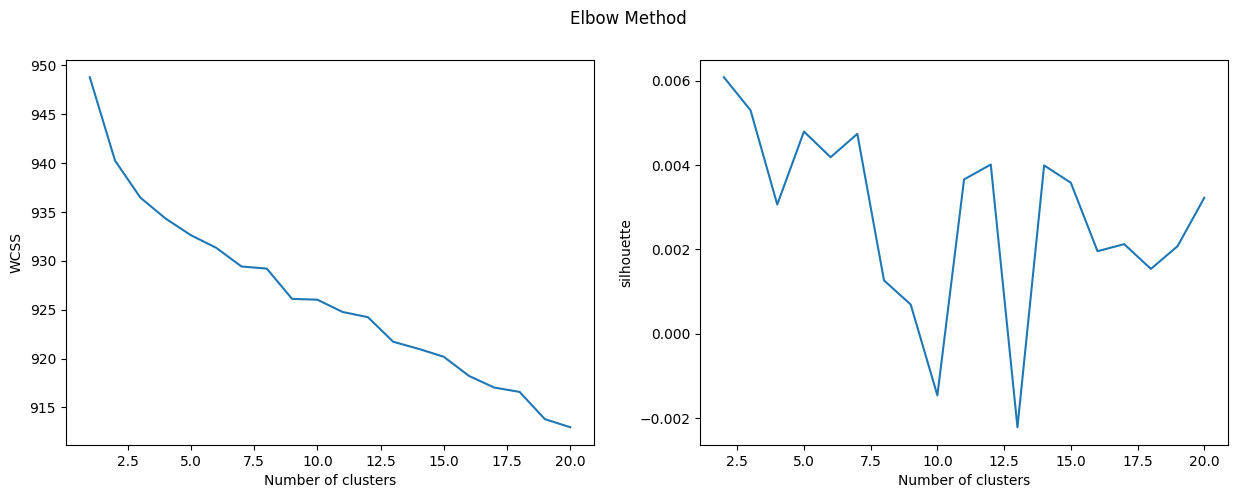

In [32]:
plot_kmeans_elbow(X_train_em, 20)

In [ ]:
cluster_model = kmeans_model(X_train_em, 7)

  0%|          | 0/19 [00:00<?, ?it/s]

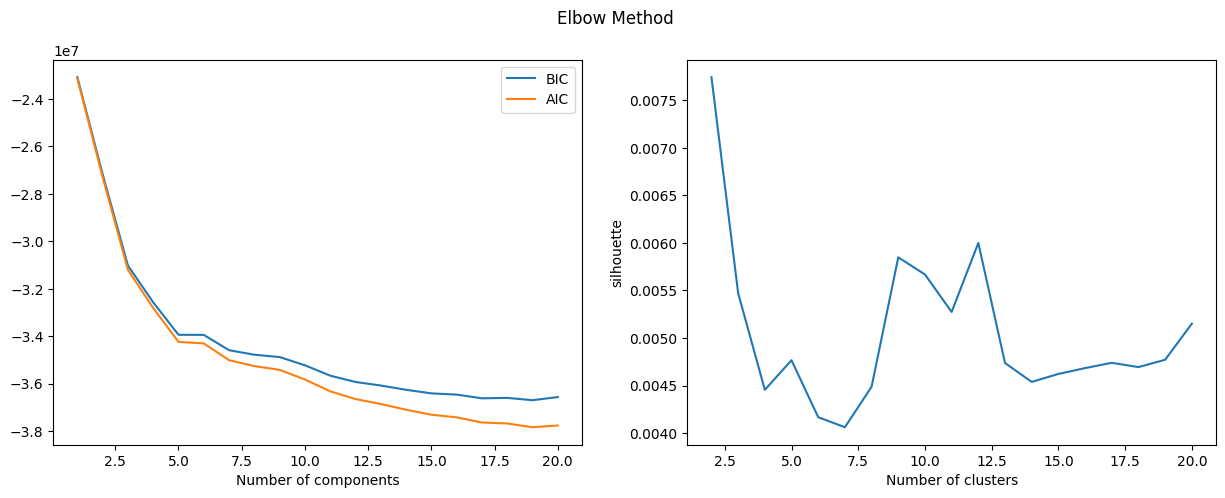

In [ ]:
plot_em_elbow(X_train_em, 20)

In [33]:
from sklearn.manifold import TSNE

In [34]:
model=kmeans_model(X_train_em, 8)

In [35]:
y=model.labels_

In [36]:
def plot_cluster(data,y,title=''):
  """
  Function : plot_cluster
  Used to plot the scatter plot after apply TSNE 
  ---------------------------------
  Input : 
  data 
  y
  title
  ---------------------------------
  Output : don't return
  """
  tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
  tsne_results = tsne.fit_transform(data)  
  plt.figure(figsize=(16,10))

  sns.scatterplot(
  x=tsne_results[:,0], y=tsne_results[:,1],
  hue=y
  )
  plt.xlabel("TSNE1",size=15)
  plt.ylabel("TSNE2",size=15)
  plt.title(title,size=20)
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.010s...
[t-SNE] Computed neighbors for 1000 samples in 0.463s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.195172
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.785675
[t-SNE] KL divergence after 300 iterations: 2.813463


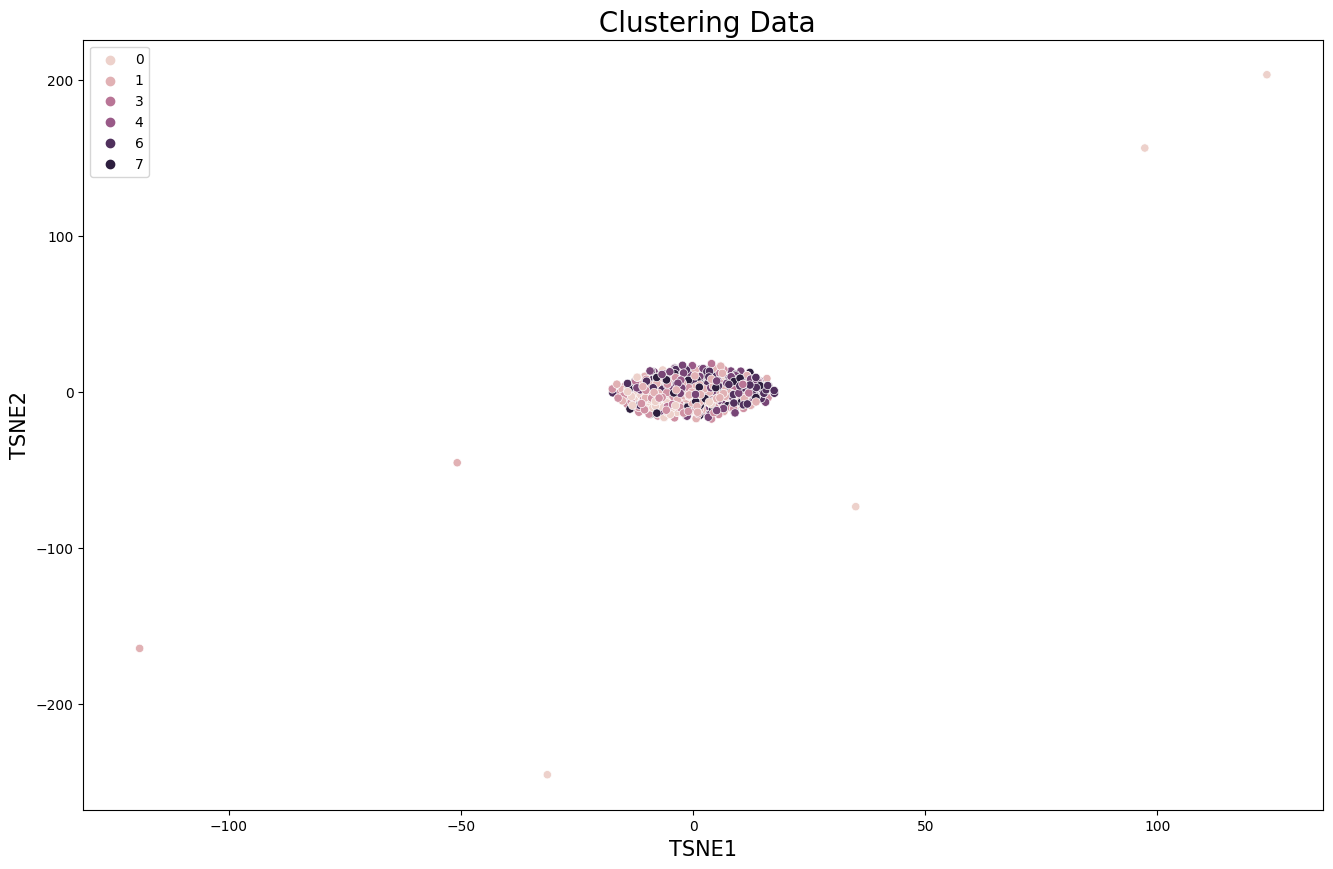

In [37]:
plot_cluster(X_train_em,y,title=' Clustering Data')